In [7]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [8]:
#read the path
file_path = "../SAGDP"
file_list = os.listdir(file_path)
# locate .csv
csv_files = glob.glob('../SAGDP/*.{}'.format('csv'))
csv_files = [i[9:] for i in csv_files if 'ALL_AREAS' in i]
# merge
  
df_concat = pd.concat([pd.read_csv(f'../SAGDP/{f}') for f in csv_files ], ignore_index=True)
df_concat = df_concat.iloc[:-4]


In [11]:
'''
some of the GDP values in the years-columns
are recorded as strings instead of floats

convert to numeric
   ---> 
'''
# select columns
cols = list(range(1998,2022))
cols = [str(i) for i in cols]
df_numeric = df_concat.fillna(0)
df_numeric[cols] = df_numeric[cols].apply(pd.to_numeric, errors='coerce').fillna(0)

'''
some tables contain irrelvant data

drop values ('SASUMMARY' and '0') of column TableName 
 --->
'''

df_numeric = df_numeric[df_numeric.TableName != 'SASUMMARY']
df_numeric = df_numeric[df_numeric.TableName != 0]

'''
Replace ' ' with '0' in Region column
Remove records of 'United States *' from GeoName cpumn
 --->
'''

df_numeric['Region'] = df_numeric['Region'].replace(' ','0')
df_numeric.GeoFIPS.unique()

i = df_numeric[(df_numeric.GeoName == 'United States *')].index
df_numeric.drop(i, inplace=True)

In [12]:
df_numeric.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
92,"""01000""",Alabama,5,SAGDP11N,1.0,...,All industry total (percent change),Percent change,3.50,3.60,...,0,0,0,0,0,0,0,0,0,0
93,"""01000""",Alabama,5,SAGDP11N,2.0,...,Private industries,Percentage points,3.29,3.44,...,0,0,0,0,0,0,0,0,0,0
94,"""01000""",Alabama,5,SAGDP11N,3.0,11,"Agriculture, forestry, fishing and hunting",Percentage points,0.18,0.21,...,0,0,0,0,0,0,0,0,0,0
95,"""01000""",Alabama,5,SAGDP11N,4.0,111-112,Farms,Percentage points,0.16,0.21,...,0,0,0,0,0,0,0,0,0,0
96,"""01000""",Alabama,5,SAGDP11N,5.0,113-115,"Forestry, fishing, and related activities",Percentage points,0.01,0.00,...,0,0,0,0,0,0,0,0,0,0


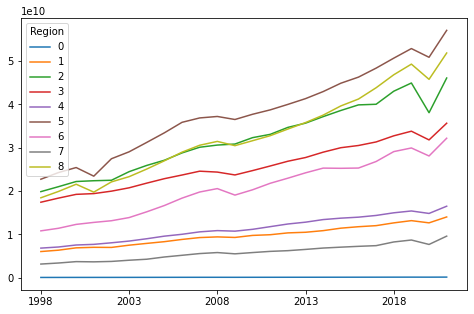

In [13]:
# df_numeric.drop(df_numeric['LineCode']).groupby('Region').sum().T.plot(figsize=(8,5));
# df_numeric.drop(df_numeric['LineCode']).groupby('Region').sum()

df_numeric.drop('LineCode', axis=1).groupby('Region').sum().T.sort_index(axis=0).plot(figsize=(8,5));

In [14]:
# save to csv

# df_numeric.to_csv('Final-GDP-dataset.csv')